In [17]:
import tensorflow as tf
from tensorflow import keras

#load Minist dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
#normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #input layer
    keras.layers.Dense(128, activation='relu'), #hidden layer
    keras.layers.Dense(10, activation='softmax'), #output layer
    
])

c:\Users\lenovo\miniconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
#model compilation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#model training
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step - accuracy: 0.8763 - loss: 0.4395
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9667 - loss: 0.1165
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9766 - loss: 0.0769
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9826 - loss: 0.0586
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9866 - loss: 0.0438


In [7]:
#model evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9713 - loss: 0.0915

Test accuracy: 0.9747999906539917


In [8]:
import numpy as np
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
Predicted digit: 4


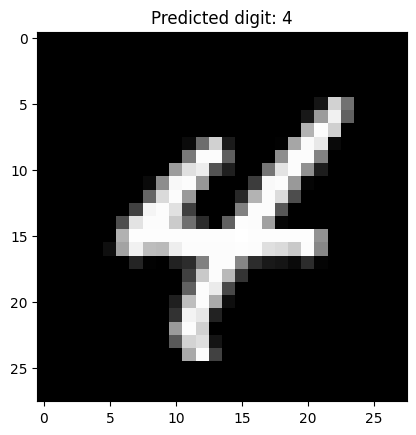

In [9]:
#randomly select an image from the test set
image_index = np.random.randint(0, x_test.shape[0])
test_image = x_test[image_index]

#model prediction
pred = model.predict(test_image.reshape(1, 28, 28))

#predict digit
predicted_digit = np.argmax(pred)
print(f'Predicted digit: {predicted_digit}')

#image showing
plt.imshow(test_image, cmap='gray')
plt.title(f'Predicted digit: {predicted_digit}')
plt.show()

CNN

In [10]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [14]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

#Reshape the data
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')/255
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')/255

In [19]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

c:\Users\lenovo\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 107s 53ms/step - accuracy: 0.8998 - loss: 0.3235
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 53ms/step - accuracy: 0.9848 - loss: 0.0515
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 106s 56ms/step - accuracy: 0.9899 - loss: 0.0337
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 98s 52ms/step - accuracy: 0.9922 - loss: 0.0240
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 100s 53ms/step - accuracy: 0.9937 - loss: 0.0185


In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9880 - loss: 0.0387

Test accuracy: 0.9907000064849854
